In [1]:
import numpy as np
import pandas as pd
from collections import Counter
import math
import matplotlib.pyplot as plt

In [2]:
data = pd.read_table("onlyhash.data",names=["user","date","hashtag"])
data.head()

,user,date,hashtag
0,webcom09,2008-11-11,#webcom08
1,kirsn,2008-11-11,#cassandra
2,mediahatch,2008-11-11,#pubcon
3,Give_Respect,2008-11-11,#107
4,Nathan_Safran,2008-11-11,#2


In [3]:
data.shape

(926507, 3)

In [4]:
data["hashtag_list"] = data.hashtag.apply(lambda x: x.split(" "))
# data = data.head(10)
data.head(5)

,user,date,hashtag,hashtag_list
0,webcom09,2008-11-11,#webcom08,[#webcom08]
1,kirsn,2008-11-11,#cassandra,[#cassandra]
2,mediahatch,2008-11-11,#pubcon,[#pubcon]
3,Give_Respect,2008-11-11,#107,[#107]
4,Nathan_Safran,2008-11-11,#2,[#2]


In [5]:
x = data[data["date"] == '2009-10-12']
print(len(x))
print(len(x.user.unique()))

17517
7637


In [6]:
data.hashtag_list.values

array([['#webcom08'], ['#cassandra'], ['#pubcon'], ..., ['#jobsearch'],
       ['#animation', '#toystory3', '#toystory'], ['#yshuttle']], dtype=object)

In [7]:
data.shape

(926507, 4)

In [8]:
data.user.value_counts().mean()

14.273937358455685

In [9]:
users = data.user.unique()
#print(len(users))
index = [i for i in range(1, len(users)+1)]

dates = data.date.unique()
index2 = [i for i in range(1, len(dates)+1)]

In [10]:
df = pd.DataFrame(users, index=index, columns=['user'])
df = df.head(1000)

In [11]:
data1 = data[data["user"] == "GetFreelanceJob"]
vals = data1["hashtag_list"].values
list_has = [val for sublist in vals for val in sublist]
#list_has

In [12]:
def get_hash(user_name, dataframe):
    dataframe = dataframe[dataframe["user"] == user_name]
    hashtag_list = dataframe["hashtag_list"].values
    list_hash = [val for sublist in hashtag_list for val in sublist]
    return list_hash

In [13]:
df["hashtags"] = df.user.apply(lambda x: get_hash(x, data))

In [14]:
df.head()

,user,hashtags
1,webcom09,"[#webcom08, #webcom08, #webcom08., #webcom08.,..."
2,kirsn,"[#cassandra, #BlackAlbum, #twitgin, #ubuntu, #..."
3,mediahatch,"[#pubcon, #pubcon, #pubcon, #pubcon, #pubcon, ..."
4,Give_Respect,"[#107, #108, #109, #110, #111, #112, #113, #11..."
5,Nathan_Safran,"[#2, #forrester]"


In [15]:
# df.hashtags.values[0]

In [16]:
def entropy(counter_list):
#     log2 = lambda x: math.log(x,2)
    c = Counter(counter_list)
    ent = 0.0
    for k,v in c.items():
        p = float(v)/len(counter_list)
        ent = ent - p*math.log2(p)
    return ent

In [17]:
df["user_entropy"] = df.hashtags.apply(lambda x: entropy(x))

In [18]:
df.head()

,user,hashtags,user_entropy
1,webcom09,"[#webcom08, #webcom08, #webcom08., #webcom08.,...",2.473682
2,kirsn,"[#cassandra, #BlackAlbum, #twitgin, #ubuntu, #...",3.947703
3,mediahatch,"[#pubcon, #pubcon, #pubcon, #pubcon, #pubcon, ...",1.148835
4,Give_Respect,"[#107, #108, #109, #110, #111, #112, #113, #11...",3.467720
5,Nathan_Safran,"[#2, #forrester]",1.000000


In [19]:
df.user_entropy.mean()

2.05291473112788

In [20]:
# for bri 
# calc_sys_for_one_date(date):
#    return sys ent
# put it in an array 

In [21]:
data["entropy"] = data.hashtag_list.apply(lambda x: entropy(x))

In [22]:
data.head()

,user,date,hashtag,hashtag_list,entropy
0,webcom09,2008-11-11,#webcom08,[#webcom08],0.0
1,kirsn,2008-11-11,#cassandra,[#cassandra],0.0
2,mediahatch,2008-11-11,#pubcon,[#pubcon],0.0
3,Give_Respect,2008-11-11,#107,[#107],0.0
4,Nathan_Safran,2008-11-11,#2,[#2],0.0


In [23]:
grp = data.groupby(["date"]).entropy.mean()
user_entropy_by_day = grp.to_frame()
user_entropy_by_day.describe()

,entropy
count,387.000000
mean,0.246706
std,0.183740
min,0.000000
25%,0.108384
50%,0.284510
75%,0.338709
max,1.584963


In [24]:
user_entropy_by_day.head()

,entropy
date,
2007-04-03,0.0
2007-04-13,0.0
2007-06-26,0.0
2007-07-14,1.0
2007-07-25,0.0


In [25]:
df.head()

,user,hashtags,user_entropy
1,webcom09,"[#webcom08, #webcom08, #webcom08., #webcom08.,...",2.473682
2,kirsn,"[#cassandra, #BlackAlbum, #twitgin, #ubuntu, #...",3.947703
3,mediahatch,"[#pubcon, #pubcon, #pubcon, #pubcon, #pubcon, ...",1.148835
4,Give_Respect,"[#107, #108, #109, #110, #111, #112, #113, #11...",3.467720
5,Nathan_Safran,"[#2, #forrester]",1.000000


In [26]:
df2 = pd.DataFrame(dates, index=index2, columns=['date'])

In [27]:
df2.head()

,date
1,2008-11-11
2,2008-11-12
3,2008-11-13
4,2008-11-14
5,2008-11-15


In [28]:
def get_hash_date(date, dataframe):
    dataframe = dataframe[dataframe["date"] == date]
    hashtag_list = dataframe["hashtag_list"].values
    list_hash = [val for sublist in hashtag_list for val in sublist]
    return list_hash

In [29]:
df2["hashtags"] = df2.date.apply(lambda x: get_hash_date(x, data))

In [30]:
df2.head()

,date,hashtags
1,2008-11-11,"[#webcom08, #cassandra, #pubcon, #107, #2, #pu..."
2,2008-11-12,"[#gno, #gno, #gno, #gno, #gno, #gno, #gno, #gn..."
3,2008-11-13,"[#barcampsydney, #ActiveVC, #22, #1:, #2:, #st..."
4,2008-11-14,"[#barcampsydney, #WoW, #barcampsydney4, #start..."
5,2008-11-15,"[#bcs4,, #sfgreenfest, #mashupcamp, #bcs4, #bc..."


In [31]:
df2["sys_entropy"] = df2.hashtags.apply(lambda x: entropy(x))

In [32]:
df2.describe()

,sys_entropy
count,387.000000
mean,7.001573
std,3.493284
min,0.000000
25%,4.483394
50%,8.215134
75%,9.757742
max,11.887364


In [33]:
user_entropy_by_day.head()

,entropy
date,
2007-04-03,0.0
2007-04-13,0.0
2007-06-26,0.0
2007-07-14,1.0
2007-07-25,0.0


In [34]:
df2.head()

,date,hashtags,sys_entropy
1,2008-11-11,"[#webcom08, #cassandra, #pubcon, #107, #2, #pu...",2.866248
2,2008-11-12,"[#gno, #gno, #gno, #gno, #gno, #gno, #gno, #gn...",3.050780
3,2008-11-13,"[#barcampsydney, #ActiveVC, #22, #1:, #2:, #st...",3.710738
4,2008-11-14,"[#barcampsydney, #WoW, #barcampsydney4, #start...",4.414994
5,2008-11-15,"[#bcs4,, #sfgreenfest, #mashupcamp, #bcs4, #bc...",2.897271


In [35]:
user_entropy_by_day['date'] = user_entropy_by_day.index

In [36]:
print(len(user_entropy_by_day))
print(len(df2))

387
387


In [37]:
entropy_df = pd.merge(df2, user_entropy_by_day, on='date', how='outer')
len(entropy_df)

387

In [38]:
entropy_df.head()

,date,hashtags,sys_entropy,entropy
0,2008-11-11,"[#webcom08, #cassandra, #pubcon, #107, #2, #pu...",2.866248,0.000000
1,2008-11-12,"[#gno, #gno, #gno, #gno, #gno, #gno, #gno, #gn...",3.050780,0.000000
2,2008-11-13,"[#barcampsydney, #ActiveVC, #22, #1:, #2:, #st...",3.710738,0.000000
3,2008-11-14,"[#barcampsydney, #WoW, #barcampsydney4, #start...",4.414994,0.044027
4,2008-11-15,"[#bcs4,, #sfgreenfest, #mashupcamp, #bcs4, #bc...",2.897271,0.035714


In [39]:
ranked = entropy_df.sort_values(by="sys_entropy")
ranked.head()

,date,hashtags,sys_entropy,entropy
292,2007-10-03,[#OAuth!!!],0.0,0.0
287,2007-10-01,[#1],0.0,0.0
289,2007-10-02,[#\],0.0,0.0
294,2007-10-04,[#18:],0.0,0.0
295,2007-10-05,[#OAuth],0.0,0.0


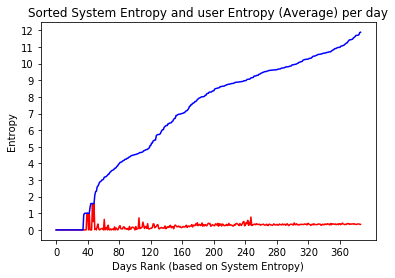

In [40]:
import matplotlib.pyplot as plt
length=len(ranked)
x = [x for x in range(0,length)]
plt.title("Sorted System Entropy and user Entropy (Average) per day")
plt.xticks(np.arange(0,max(x),40))
plt.yticks(range(0,int(max(ranked.sys_entropy)+2)))
plt.xlabel("Days Rank (based on System Entropy)")
plt.ylabel("Entropy")
plt.plot(x,ranked.entropy.values,label='User Entropy',color="r")
plt.plot(x,ranked.sys_entropy.values,label='System Entropy',color="b")
# plt.legend(loc=2)
plt.show()

## 2. Measuring inequality

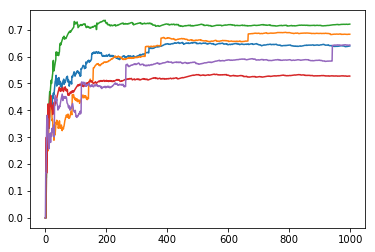

In [41]:
from chinese_restaurant import generateChineseRestaurant as chineseRes

customers = 1000
for i in range(0,5):
    tables, ginis = chineseRes(customers)
    plt.plot(ginis)
plt.show()

# 3. Herding

# Part 1 - First estimations

In [42]:
estimations = pd.DataFrame({
        "fortress":[90,250,375],
        "tower":[250,400,300]
    })

In [43]:
print("mean: ",estimations.fortress.mean())
print("std: ",estimations.fortress.std())
print("var: ",estimations.fortress.std()**2)

mean:  238.33333333333334
std:  142.85773809399802
var:  20408.333333333332


In [44]:
# print("mean: ",estimations.tower.mean())
# print("std: ",estimations.tower.std())
# print("var: ",estimations.tower.std()**2)

# Part 2 - After discussion

In [45]:
estimations = pd.DataFrame({
        "fortress":[45,75,350],
        "tower":[250,200,450],
    })

In [46]:
# print("mean: ",estimations.fortress.mean())
# print("std: ",estimations.fortress.std())
# print("var: ",estimations.fortress.std()**2)

In [47]:
print("mean: ",estimations.tower.mean())
print("std: ",estimations.tower.std())
print("var: ",estimations.tower.std()**2)

mean:  300.0
std:  132.28756555322954
var:  17500.000000000004
